<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-Data" data-toc-modified-id="Read-in-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in Data</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Organize-data" data-toc-modified-id="Organize-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Organize data</a></span><ul class="toc-item"><li><span><a href="#sPTD" data-toc-modified-id="sPTD-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>sPTD</a></span></li><li><span><a href="#PPROM" data-toc-modified-id="PPROM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>PPROM</a></span></li><li><span><a href="#Both" data-toc-modified-id="Both-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Both</a></span></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#std" data-toc-modified-id="std-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>std</a></span></li><li><span><a href="#Univariate-Feature-Selection" data-toc-modified-id="Univariate-Feature-Selection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Univariate Feature Selection</a></span></li><li><span><a href="#Multivariate-Feature-Selection" data-toc-modified-id="Multivariate-Feature-Selection-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Multivariate Feature Selection</a></span></li></ul></li><li><span><a href="#Model-Development" data-toc-modified-id="Model-Development-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Development</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#First-try" data-toc-modified-id="First-try-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>First try</a></span></li><li><span><a href="#Tune-hyperparameters" data-toc-modified-id="Tune-hyperparameters-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Tune hyperparameters</a></span></li><li><span><a href="#Recursive-elimination-of-features" data-toc-modified-id="Recursive-elimination-of-features-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>Recursive elimination of features</a></span></li><li><span><a href="#Performance-with-recursive-elimination-selected-features" data-toc-modified-id="Performance-with-recursive-elimination-selected-features-5.0.4"><span class="toc-item-num">5.0.4&nbsp;&nbsp;</span>Performance with recursive elimination selected features</a></span></li><li><span><a href="#Tune-hyperparameters-with-recursive-elimination-selected-features" data-toc-modified-id="Tune-hyperparameters-with-recursive-elimination-selected-features-5.0.5"><span class="toc-item-num">5.0.5&nbsp;&nbsp;</span>Tune hyperparameters with recursive elimination selected features</a></span></li><li><span><a href="#Final-decision" data-toc-modified-id="Final-decision-5.0.6"><span class="toc-item-num">5.0.6&nbsp;&nbsp;</span>Final decision</a></span></li><li><span><a href="#Using-features-selected-with-another-methods" data-toc-modified-id="Using-features-selected-with-another-methods-5.0.7"><span class="toc-item-num">5.0.7&nbsp;&nbsp;</span>Using features selected with another methods</a></span></li></ul></li></ul></li><li><span><a href="#Algorithms-and-selected-genes-comparison" data-toc-modified-id="Algorithms-and-selected-genes-comparison-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Algorithms and selected genes comparison</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#sPTD" data-toc-modified-id="sPTD-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span>sPTD</a></span></li><li><span><a href="#PPROM" data-toc-modified-id="PPROM-6.0.0.2"><span class="toc-item-num">6.0.0.2&nbsp;&nbsp;</span>PPROM</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Ensemble-All-3-Algorithms!" data-toc-modified-id="Ensemble-All-3-Algorithms!-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ensemble All 3 Algorithms!</a></span><ul class="toc-item"><li><span><a href="#Let's-decide-an-ensemble-way!" data-toc-modified-id="Let's-decide-an-ensemble-way!-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Let's decide an ensemble way!</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#selected-genes-comparison" data-toc-modified-id="selected-genes-comparison-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>selected genes comparison</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Decision Tree</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.utils import shuffle
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

## Read in Data

In [2]:
annotation = pd.read_csv('./data/annotation.csv', index_col=0)
gene_expression = pd.read_csv('./data/gene_expression.csv', index_col=0)

In [3]:
gene_expression.shape

(29459, 739)

In [4]:
annotation.head()

,SampleID,IndividualID,GA,GADel,Group,Set,Train,Platform,TTD
1,GSM1437802,515122,28.0,40.0,Control,GSE59491,1,HG21ST,12.0
2,GSM1437801,515122,19.0,40.0,Control,GSE59491,1,HG21ST,21.0
3,GSM1437804,810384,28.0,40.0,Control,GSE59491,1,HG21ST,12.0
4,GSM1437803,810384,18.0,40.0,Control,GSE59491,1,HG21ST,22.0
5,GSM1437806,810392,28.0,41.0,Control,GSE59491,1,HG21ST,13.0


In [5]:
gene_expression.head()

,GSM1437802,GSM1437801,GSM1437804,GSM1437803,GSM1437806,GSM1437805,GSM1437808,GSM1437807,GSM1437810,GSM1437809,...,Tarca_008_P1A08,Tarca_091_P1H07,Tarca_492_P6D02,Tarca_491_P6C02,Tarca_506_P6B04,Tarca_920_P10H07,Tarca_919_P10G07,Tarca_918_P10F07,Tarca_917_P10E07,Tarca_916_P10D07
1_at,5.673714,5.657469,5.263798,5.621857,5.746427,5.382171,5.977089,5.771783,5.511752,5.302418,...,5.788344,5.543969,5.128486,5.343032,5.577095,5.767927,5.982427,5.869221,5.871484,5.752629
10_at,3.722012,3.027650,3.095365,3.429769,2.938438,3.055553,2.838617,2.977819,2.944549,2.977487,...,2.919084,2.970130,2.714327,3.012835,2.918379,2.973631,3.044613,3.321144,3.039177,2.976313
100_at,6.844537,6.979622,7.311993,7.406321,7.155013,6.930386,7.300295,7.156051,7.512933,7.163658,...,7.328793,7.189998,7.414430,7.559631,7.511595,7.325456,7.149270,7.130817,7.139528,7.203337
1000_at,4.209495,3.973889,4.126598,3.721685,3.899342,4.073817,3.811101,3.766648,4.029314,4.153578,...,3.718119,3.714274,3.902793,3.870281,3.860453,4.062084,4.034426,4.021482,3.999080,3.980084
10000_at,6.915998,6.820816,6.785624,6.665341,6.637787,6.552980,6.695902,6.714650,6.564450,6.640959,...,6.596466,6.693787,7.315201,7.284721,6.636553,6.501599,6.297040,6.600034,6.229878,6.284294


In [6]:
gene_expression_GA = gene_expression.copy()
gene_expression_GA.loc['GA', :] = annotation['GA'].values
gene_expression_GA.head()

,GSM1437802,GSM1437801,GSM1437804,GSM1437803,GSM1437806,GSM1437805,GSM1437808,GSM1437807,GSM1437810,GSM1437809,...,Tarca_008_P1A08,Tarca_091_P1H07,Tarca_492_P6D02,Tarca_491_P6C02,Tarca_506_P6B04,Tarca_920_P10H07,Tarca_919_P10G07,Tarca_918_P10F07,Tarca_917_P10E07,Tarca_916_P10D07
1_at,5.673714,5.657469,5.263798,5.621857,5.746427,5.382171,5.977089,5.771783,5.511752,5.302418,...,5.788344,5.543969,5.128486,5.343032,5.577095,5.767927,5.982427,5.869221,5.871484,5.752629
10_at,3.722012,3.027650,3.095365,3.429769,2.938438,3.055553,2.838617,2.977819,2.944549,2.977487,...,2.919084,2.970130,2.714327,3.012835,2.918379,2.973631,3.044613,3.321144,3.039177,2.976313
100_at,6.844537,6.979622,7.311993,7.406321,7.155013,6.930386,7.300295,7.156051,7.512933,7.163658,...,7.328793,7.189998,7.414430,7.559631,7.511595,7.325456,7.149270,7.130817,7.139528,7.203337
1000_at,4.209495,3.973889,4.126598,3.721685,3.899342,4.073817,3.811101,3.766648,4.029314,4.153578,...,3.718119,3.714274,3.902793,3.870281,3.860453,4.062084,4.034426,4.021482,3.999080,3.980084
10000_at,6.915998,6.820816,6.785624,6.665341,6.637787,6.552980,6.695902,6.714650,6.564450,6.640959,...,6.596466,6.693787,7.315201,7.284721,6.636553,6.501599,6.297040,6.600034,6.229878,6.284294


## PCA

In [42]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(gene_expression.T)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

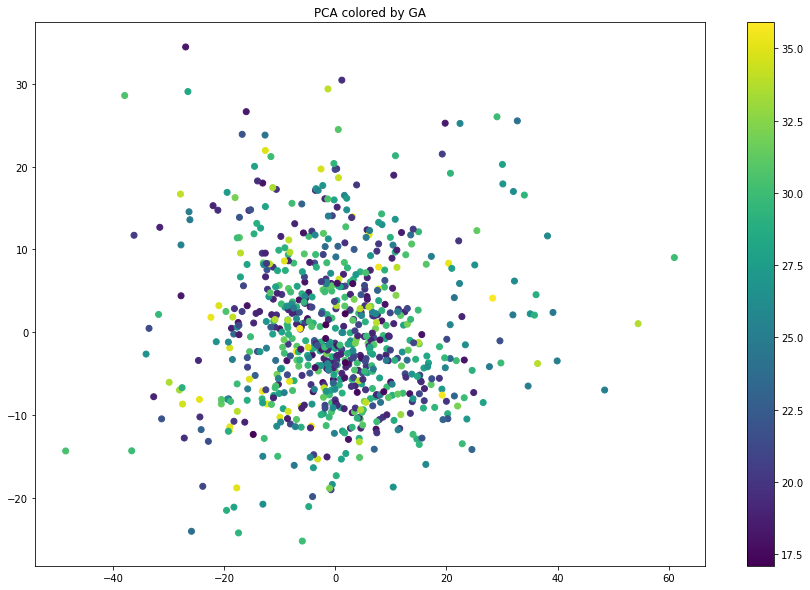

In [58]:
principalDf.loc[:, 'GA'] = annotation['GA'].values
plt.figure(figsize=(15,10))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['GA'])
plt.colorbar()
plt.title('PCA colored by GA')

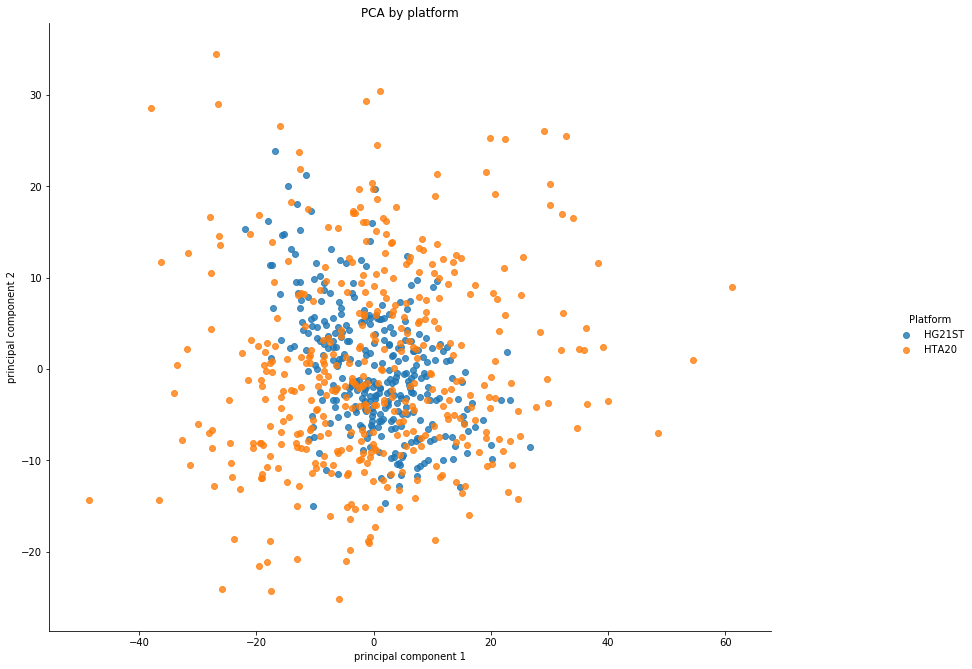

In [98]:
principalDf.loc[:, 'Platform'] = annotation['Platform'].values
platform_plot = sns.lmplot(x="principal component 1", y="principal component 2", data=principalDf, 
                           fit_reg=False, hue='Platform', legend=True)
platform_plot.fig.set_figwidth(15)
platform_plot.fig.set_figheight(10)
platform_plot.ax.set_title('PCA by platform')

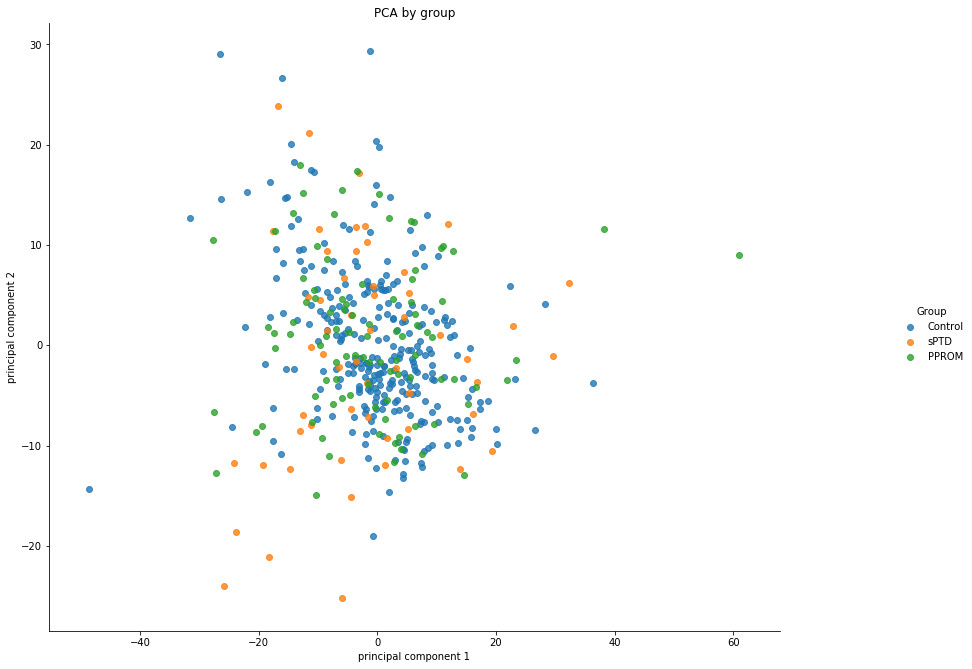

In [100]:
principalDf.loc[:, 'Group'] = annotation['Group'].values
platform_plot = sns.lmplot(x="principal component 1", y="principal component 2", data=principalDf, 
                           fit_reg=False, hue='Group', legend=True)
platform_plot.fig.set_figwidth(15)
platform_plot.fig.set_figheight(10)
platform_plot.ax.set_title('PCA by group')

## Organize data

### sPTD

In [7]:
sPTD_index = annotation[(annotation['Group'] == 'sPTD') & (annotation['Train'] == 1)]['SampleID'] #55
control_index = annotation[(annotation['Group'] == 'Control') & (annotation['Train'] == 1)]['SampleID']#285

In [8]:
gene_expression[pd.concat([sPTD_index, control_index])].T.head()

,1_at,10_at,100_at,1000_at,10000_at,100009613_at,100009676_at,10001_at,10002_at,10003_at,...,9987_at,9988_at,9989_at,999_at,9990_at,9991_at,9992_at,9993_at,9994_at,9997_at
GSM1437810,5.511752,2.944549,7.512933,4.029314,6.564450,4.240846,6.347655,6.801058,4.501354,2.713820,...,8.762870,8.106219,8.877520,5.932616,10.050322,10.306291,3.431962,8.885501,6.566986,6.986337
GSM1437809,5.302418,2.977487,7.163658,4.153578,6.640959,4.657196,6.421690,6.867667,4.334812,2.546507,...,9.052456,8.282753,8.872234,5.763782,10.193552,10.018784,3.569207,9.151631,6.463455,7.143755
GSM1437857,5.553600,2.667715,6.893251,3.603015,6.697281,3.760056,6.212933,6.820166,4.903176,2.723033,...,8.938768,8.390211,9.128623,5.530694,10.102687,10.214753,3.202101,9.014356,6.691092,7.044624
GSM1437856,5.451818,2.563685,7.120646,3.536281,6.823607,3.811454,6.355963,6.750754,4.378562,2.808022,...,9.405152,8.583493,8.928437,4.931727,10.065778,10.145170,3.048295,8.897494,6.835265,7.292721
GSM1437861,5.359950,3.588613,6.763786,3.503200,6.665591,3.563897,6.200817,6.980844,4.271369,2.410740,...,9.002586,8.505073,9.028018,5.981121,9.976774,10.153641,4.130884,8.840283,7.255947,7.394347


In [9]:
gene_expression_label_sPTD = gene_expression[pd.concat([sPTD_index, control_index])].T.copy()
gene_expression_label_sPTD['label'] = 0
gene_expression_label_sPTD.loc[sPTD_index.values, 'label'] = 1

In [10]:
X_sPTD = gene_expression_label_sPTD.drop('label', axis=1).values
y_sPTD = gene_expression_label_sPTD['label'].values

In [11]:
print(X_sPTD.shape)
print(y_sPTD.shape)

(340, 29459)
(340,)


In [12]:
X_sPTD_train, X_sPTD_test, y_sPTD_train, y_sPTD_test = train_test_split(X_sPTD, y_sPTD, test_size=0.33, random_state=934)

### PPROM

In [13]:
PPROM_index = annotation[(annotation['Group'] == 'PPROM') & (annotation['Train'] == 1)]['SampleID'] #95

In [14]:
gene_expression_label_PPROM = gene_expression[pd.concat([PPROM_index, control_index])].T.copy()
gene_expression_label_PPROM['label'] = 0
gene_expression_label_PPROM.loc[PPROM_index.values, 'label'] = 1

In [15]:
gene_expression_label_PPROM.head()

,1_at,10_at,100_at,1000_at,10000_at,100009613_at,100009676_at,10001_at,10002_at,10003_at,...,9988_at,9989_at,999_at,9990_at,9991_at,9992_at,9993_at,9994_at,9997_at,label
GSM1437845,5.554325,2.904265,7.070310,3.878922,6.704998,3.978187,6.304834,6.726574,4.805109,2.749964,...,8.299180,8.944558,5.857279,10.012442,10.116592,3.300714,8.639479,6.666284,6.927852,1
GSM1437844,5.262127,3.141959,7.276739,4.025887,6.670898,4.274706,6.255846,6.737841,4.792132,2.452819,...,8.264678,8.628172,5.843332,9.889747,10.000788,3.533001,8.786790,6.705775,6.988959,1
GSM1437886,5.571433,3.086845,6.797790,3.605881,6.484995,3.633618,6.141676,6.692825,4.652518,2.470244,...,8.285442,9.241060,6.011868,10.217460,10.407335,3.871044,9.100006,6.258081,7.167837,1
GSM1437885,5.450787,3.115800,6.670564,3.857079,6.715303,4.296487,6.432391,6.833692,4.005620,2.364114,...,8.241588,9.280465,6.024727,10.151052,10.000788,3.557081,9.081018,7.097500,7.239466,1
GSM1437894,5.926112,2.994637,7.400539,3.555315,6.640560,4.116319,6.425628,6.588750,4.597413,2.629174,...,8.378761,8.712465,5.778184,9.590988,9.922530,3.727725,8.258058,6.931918,7.105223,1


In [16]:
X_PPROM = gene_expression_label_PPROM.drop('label', axis=1).values
y_PPROM = gene_expression_label_PPROM['label'].values

In [17]:
print(X_PPROM.shape)
print(y_PPROM.shape)

(380, 29459)
(380,)


In [18]:
X_PPROM_train, X_PPROM_test, y_PPROM_train, y_PPROM_test = train_test_split(X_PPROM, y_PPROM, test_size=0.33, random_state=934)

### Both

In [20]:
gene_expression_label_both = gene_expression[pd.concat([sPTD_index, PPROM_index, control_index])].T.copy()
gene_expression_label_both['label'] = 0
gene_expression_label_both.loc[sPTD_index.values, 'label'] = 1
gene_expression_label_both.loc[PPROM_index.values, 'label'] = 2

In [21]:
X_both = gene_expression_label_both.drop('label', axis=1).values
y_both = gene_expression_label_both['label'].values

In [22]:
print(X_both.shape)
print(y_both.shape)

(435, 29459)
(435,)


## Feature Selection

[Selection results](https://docs.google.com/spreadsheets/d/1kUDmAP1k87cgVAhkUMkRdE7AvjauoFRekSFh-tTzGRQ/edit?usp=sharing)

### std

In [65]:
gene_expression.std(axis=1).sort_values(ascending=False).head(150).index

Index(['105377885_at', '3127_at', '3050_at', '105377884_at', '28475_at',
       '105376839_at', '102724528_at', '647859_at', '7280_at', '722_at',
       ...
       '6286_at', '28500_at', '391267_at', '107986485_at', '28943_at',
       '9934_at', '79854_at', '3240_at', '2999_at', '26816_at'],
      dtype='object', length=150)

### Univariate Feature Selection

[sklearn feature selection page](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [34]:
chi2_selector = SelectKBest(chi2, k=150)
chi2_selector.fit(X_sPTD, y_sPTD) #SelectKBest(chi2, k=150).fit_transform(X_sPTD, y_sPTD)
cols = chi2_selector.get_support(indices=True)

In [36]:
chi2_selected_cols_sPTD = gene_expression_label_sPTD.columns[cols]
chi2_selected_cols_sPTD

Index(['100049587_at', '100129792_at', '100130418_at', '100130520_at',
       '100147834_at', '100158262_at', '100170227_at', '100287029_at',
       '100288486_at', '100506159_at',
       ...
       '84777_at', '84873_at', '858_at', '8876_at', '91353_at', '91543_at',
       '93035_at', '93474_at', '93978_at', '9732_at'],
      dtype='object', length=150)

In [46]:
chi2_selector = SelectKBest(chi2, k=150)
chi2_selector.fit(X_PPROM, y_PPROM) #SelectKBest(chi2, k=150).fit_transform(X_sPTD, y_sPTD)
cols = chi2_selector.get_support(indices=True)

In [47]:
chi2_selected_cols_PPROM = gene_expression_label_PPROM.columns[cols]
chi2_selected_cols_PPROM

Index(['100049587_at', '100128590_at', '100287029_at', '100288486_at',
       '100289635_at', '100302170_at', '100302279_at', '100313829_at',
       '100379345_at', '100422896_at',
       ...
       '79056_at', '791115_at', '79854_at', '83857_at', '8781_at', '8807_at',
       '8876_at', '932_at', '938_at', '9732_at'],
      dtype='object', length=150)

In [37]:
chi2_selector = SelectKBest(chi2, k=150)
chi2_selector.fit(X_both, y_both) #SelectKBest(chi2, k=150).fit_transform(X_sPTD, y_sPTD)
cols = chi2_selector.get_support(indices=True)

In [38]:
chi2_selected_cols_both = gene_expression_label_both.columns[cols]
chi2_selected_cols_both

Index(['100049587_at', '100128590_at', '100287029_at', '100288486_at',
       '100302170_at', '100422896_at', '100506159_at', '100528020_at',
       '100616152_at', '100616246_at',
       ...
       '820_at', '83857_at', '84771_at', '8781_at', '8807_at', '8876_at',
       '91543_at', '932_at', '938_at', '9732_at'],
      dtype='object', length=150)

In [49]:
f_classif_selector = SelectKBest(f_classif, k=150)
f_classif_selector.fit(X_sPTD, y_sPTD) #SelectKBest(chi2, k=150).fit_transform(X_sPTD, y_sPTD)
cols = f_classif_selector.get_support(indices=True)

In [50]:
f_classif_selected_cols_sPTD = gene_expression_label_sPTD.columns[cols]
f_classif_selected_cols_sPTD

Index(['100049587_at', '100101490_at', '100287569_at', '100288486_at',
       '10049_at', '100507634_at', '100874200_at', '10096_at', '10186_at',
       '10236_at',
       ...
       '84777_at', '84899_at', '85027_at', '8732_at', '90231_at', '9220_at',
       '93978_at', '9732_at', '9774_at', '9846_at'],
      dtype='object', length=150)

In [51]:
f_classif_selector = SelectKBest(f_classif, k=150)
f_classif_selector.fit(X_PPROM, y_PPROM) #SelectKBest(chi2, k=150).fit_transform(X_sPTD, y_sPTD)
cols = f_classif_selector.get_support(indices=True)

In [52]:
f_classif_selected_cols_PPROM = gene_expression_label_PPROM.columns[cols]
f_classif_selected_cols_PPROM

Index(['10011_at', '100126313_at', '100128590_at', '100233209_at',
       '100289635_at', '101927415_at', '105369595_at', '105372482_at',
       '10557_at', '106144535_at',
       ...
       '919_at', '92285_at', '9524_at', '96459_at', '9653_at', '9693_at',
       '9732_at', '9760_at', '977_at', '9861_at'],
      dtype='object', length=150)

In [44]:
f_classif_selector = SelectKBest(f_classif, k=150)
f_classif_selector.fit(X_both, y_both) #SelectKBest(chi2, k=150).fit_transform(X_sPTD, y_sPTD)
cols = f_classif_selector.get_support(indices=True)

In [45]:
f_classif_selected_cols_both = gene_expression_label_both.columns[cols]
f_classif_selected_cols_both

Index(['10011_at', '100128590_at', '100287569_at', '100288486_at', '10096_at',
       '10186_at', '10385_at', '10492_at', '105369595_at', '105369609_at',
       ...
       '8934_at', '8935_at', '9022_at', '917_at', '9220_at', '9524_at',
       '9693_at', '9697_at', '9732_at', '9846_at'],
      dtype='object', length=150)

In [55]:
mutual_info_classif_selector = SelectKBest(mutual_info_classif, k=150)
mutual_info_classif_selector.fit(X_sPTD, y_sPTD) #SelectKBest(chi2, k=150).fit_transform(X_sPTD, y_sPTD)
cols = mutual_info_classif_selector.get_support(indices=True)

In [57]:
mutual_info_classif_selected_cols_sPTD = gene_expression_label_sPTD.columns[cols]
mutual_info_classif_selected_cols_sPTD

Index(['100124412_at', '100127905_at', '100130520_at', '10022_at',
       '100289388_at', '100289473_at', '100505933_at', '100506755_at',
       '100507562_at', '10051_at',
       ...
       '9126_at', '9156_at', '92799_at', '9318_at', '94236_at', '9515_at',
       '9547_at', '9826_at', '9871_at', '990_at'],
      dtype='object', length=150)

In [59]:
mutual_info_classif_selector = SelectKBest(mutual_info_classif, k=150)
mutual_info_classif_selector.fit(X_PPROM, y_PPROM) #SelectKBest(chi2, k=150).fit_transform(X_sPTD, y_sPTD)
cols = mutual_info_classif_selector.get_support(indices=True)

In [60]:
mutual_info_classif_selected_cols_PPROM = gene_expression_label_PPROM.columns[cols]
mutual_info_classif_selected_cols_PPROM

Index(['100129094_at', '100129827_at', '100499405_at', '100500816_at',
       '100506190_at', '100507347_at', '100874084_at', '101060691_at',
       '101927311_at', '101927334_at',
       ...
       '8553_at', '915_at', '923_at', '924_at', '92815_at', '9636_at',
       '9810_at', '9834_at', '9968_at', '997_at'],
      dtype='object', length=150)

In [50]:
mutual_info_classif_selector = SelectKBest(mutual_info_classif, k=150)
mutual_info_classif_selector.fit(X_both, y_both) #SelectKBest(chi2, k=150).fit_transform(X_sPTD, y_sPTD)
cols = mutual_info_classif_selector.get_support(indices=True)

In [51]:
mutual_info_classif_selected_cols_both = gene_expression_label_both.columns[cols]
mutual_info_classif_selected_cols_both

Index(['100124412_at', '100126308_at', '100129827_at', '100130872_at',
       '100302135_at', '100505933_at', '100506190_at', '100506755_at',
       '100506930_at', '100507043_at',
       ...
       '85409_at', '8883_at', '89795_at', '9107_at', '92285_at', '924_at',
       '93978_at', '94236_at', '9515_at', '9968_at'],
      dtype='object', length=150)

In [52]:
pd.Series(mutual_info_classif_selected_cols_both).to_csv('./selected_col.txt', sep='\n', index=None)

### Multivariate Feature Selection

[more than multivaraite feature selection](https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b#targetText=mRMR,and%20the%20correlations%20between%20them.)

This method requires 3 input parameters:

* First parameter is a pandas DataFrame containing the input dataset, discretised as defined in the original paper (for ref. see http://home.penglab.com/proj/mRMR/). The rows of the dataset are the different samples. The first column is the classification (target) variable for each sample. The remaining columns are the different variables (features) which may be selected by the algorithm. (see "Sample Data Sets" at http://home.penglab.com/proj/mRMR/ to download sample dataset to test this algorithm);
* Second parameter is a string which defines the internal Feature Selection method to use (defined in the original paper): possible values are "MIQ" or "MID";
* Third parameter is an integer which defines the number of features that should be selected by the algorithm.

The return value is a list containing the names of the selected features.

The following is an example of execution:

```
In [1]: import pandas as pd

In [2]: import pymrmr

In [3]: df = pd.read_csv('test_colon_s3.csv')

In [4]: pymrmr.mRMR(df, 'MIQ', 10)
```

In [54]:
import pymrmr

In [23]:
cols = gene_expression_label_sPTD.columns.tolist()
cols = cols[-1:] + cols[0:-1]

note: we decided to run this using their standalone C++ version since python version is slow  
can be downloaded [here](http://home.penglab.com/proj/mRMR/#c++)

In [ ]:
sPTD_cols_mrmr = pymrmr.mRMR(gene_expression_label_sPTD[cols], 'MIQ', 150)

In [ ]:
PPROM_cols_mrmr = pymrmr.mRMR(gene_expression_label_PPROM[cols], 'MIQ', 150)

In [ ]:
both_cols_mrmr = pymrmr.mRMR(gene_expression_label_both[cols], 'MIQ', 150)

In [ ]:
pd.Series(sPTD_cols_mrmr).to_csv('./selected_col_sPTD.txt', sep='\n', index=None)

In [ ]:
pd.Series(PPROM_cols_mrmr).to_csv('./selected_col_PPROM.txt', sep='\n', index=None)

In [ ]:
pd.Series(both_cols_mrmr).to_csv('./selected_col_both.txt', sep='\n', index=None)

## Model Development

#### First try

In [38]:
rnd_clf_sPTD = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs=10) 
rnd_clf_sPTD.fit(X_sPTD_train, y_sPTD_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=10,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
pred_prob = rnd_clf_sPTD.predict_proba(X_sPTD_test)[:, 1]
print(roc_auc_score(y_sPTD_test, pred_prob))
print(average_precision_score(y_sPTD_test, pred_prob))

0.758843537414966
0.38729490861907245


In [42]:
rnd_clf_PPROM = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs=10) 
rnd_clf_PPROM.fit(X_PPROM_train, y_PPROM_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=10,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
pred_prob = rnd_clf_PPROM.predict_proba(X_PPROM_test)[:, 1]
print(roc_auc_score(y_PPROM_test, pred_prob))
print(average_precision_score(y_PPROM_test, pred_prob))

0.7060078208318521
0.44850157643427896


#### Tune hyperparameters

In [47]:
param_dist = {"max_leaf_nodes": np.arange(10, 40).tolist()+[None],
              "criterion": ["gini", "entropy"], 
              'n_estimators': [100, 200, 500, 600, 700, 1000]}

In [48]:
rnd_clf = RandomForestClassifier(n_jobs=40)

In [49]:
rnd_clf_cv = RandomizedSearchCV(rnd_clf, param_dist, cv=5)

In [50]:
rnd_clf_cv.fit(X_sPTD,y_sPTD)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=40,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_leaf_nodes': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, None], 'criterion': ['gini', 'entropy'], 'n_estimators': [100, 200, 500, 600, 700, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [51]:
print("Tuned RF Parameters: {}".format(rnd_clf_cv.best_params_))
print("Best score is {}".format(rnd_clf_cv.best_score_))

Tuned RF Parameters: {'n_estimators': 100, 'max_leaf_nodes': 23, 'criterion': 'entropy'}
Best score is 0.8411764705882353


In [52]:
rnd_clf = RandomForestClassifier(n_jobs=40)

In [53]:
rnd_clf_cv = RandomizedSearchCV(rnd_clf, param_dist, cv=5)

In [54]:
rnd_clf_cv.fit(X_PPROM,y_PPROM)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=40,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_leaf_nodes': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, None], 'criterion': ['gini', 'entropy'], 'n_estimators': [100, 200, 500, 600, 700, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [55]:
print("Tuned RF Parameters: {}".format(rnd_clf_cv.best_params_))
print("Best score is {}".format(rnd_clf_cv.best_score_))

Tuned RF Parameters: {'n_estimators': 600, 'max_leaf_nodes': 14, 'criterion': 'entropy'}
Best score is 0.7526315789473684


#### Recursive elimination of features

In [81]:
rnd_clf = RandomForestClassifier(n_estimators = 1000, max_leaf_nodes=10, criterion='entropy', n_jobs=40)

In [82]:
selector = RFE(rnd_clf, 150, step=50, verbose=True)

In [83]:
selector.fit(X_both, y_both)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=40,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
  n_features_to_select=10000, step=5000, verbose=0)

In [86]:
pd.Series(selector.support_).to_csv('./re_selected_cols.csv', index=None, header=None)

#### Performance with recursive elimination selected features

In [67]:
re_selected_cols = pd.read_csv('./gene_selection_process/re_selected_100_cols_stepsize50.csv', header=None).values.reshape(-1,)

In [59]:
re_selected_cols.shape

(29459,)

In [80]:
re_selected_cols = selector.support_

In [32]:
re_selected_cols

array([False, False, False, ..., False, False, False])

In [97]:
rnd_clf_sPTD = RandomForestClassifier(n_estimators = 1000, max_leaf_nodes=10, n_jobs=40, criterion='entropy') 
rnd_clf_sPTD.fit(X_sPTD_train[:, re_selected_cols], y_sPTD_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=40,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
pred_prob = rnd_clf_sPTD.predict_proba(X_sPTD_test[:, re_selected_cols])[:, 1]
print(roc_auc_score(y_sPTD_test, pred_prob))
print(average_precision_score(y_sPTD_test, pred_prob))

0.9170068027210885
0.6360412205681292


In [99]:
rnd_clf_PPROM = RandomForestClassifier(n_estimators = 1000, max_leaf_nodes=10, n_jobs=40, criterion='entropy') 
rnd_clf_PPROM.fit(X_PPROM_train[:, re_selected_cols], y_PPROM_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=40,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
pred_prob = rnd_clf_PPROM.predict_proba(X_PPROM_test[:, re_selected_cols])[:, 1]
print(roc_auc_score(y_PPROM_test, pred_prob))
print(average_precision_score(y_PPROM_test, pred_prob))

0.9278350515463918
0.8105261267108086


#### Tune hyperparameters with recursive elimination selected features

In [102]:
param_dist = {"max_leaf_nodes": np.arange(5, 40).tolist()+[None],
              "criterion": ["gini", "entropy"], 
              'n_estimators': np.arange(100, 2000, 10)}

In [103]:
rnd_clf = RandomForestClassifier()

In [104]:
rnd_clf_cv = RandomizedSearchCV(rnd_clf, param_dist, cv=5, scoring='roc_auc', random_state=934, n_jobs=40)

In [105]:
rnd_clf_cv.fit(X_sPTD[:, re_selected_cols],y_sPTD)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=40,
          param_distributions={'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, None], 'criterion': ['gini', 'entropy'], 'n_estimators': array([ 100,  110, ..., 1980, 1990])},
          pre_dispatch='2*n_jobs', random_state=934, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [106]:
print("Tuned RF Parameters: {}".format(rnd_clf_cv.best_params_))
print("Best score is {}".format(rnd_clf_cv.best_score_))

Tuned RF Parameters: {'n_estimators': 1210, 'max_leaf_nodes': 33, 'criterion': 'entropy'}
Best score is 0.9360446570972887


In [107]:
rnd_clf_cv = RandomizedSearchCV(rnd_clf, param_dist, cv=5, scoring='roc_auc', n_jobs=40)

In [108]:
rnd_clf_cv.fit(X_PPROM[:, re_selected_cols],y_PPROM)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=40,
          param_distributions={'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, None], 'criterion': ['gini', 'entropy'], 'n_estimators': array([ 100,  110, ..., 1980, 1990])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [109]:
print("Tuned RF Parameters: {}".format(rnd_clf_cv.best_params_))
print("Best score is {}".format(rnd_clf_cv.best_score_))

Tuned RF Parameters: {'n_estimators': 1050, 'max_leaf_nodes': 33, 'criterion': 'entropy'}
Best score is 0.8784856879039704


#### Final decision

In [110]:
rnd_clf_sPTD = RandomForestClassifier(n_estimators = 1200, max_leaf_nodes=30, n_jobs=40, criterion='entropy') 
rnd_clf_sPTD.fit(X_sPTD_train[:, re_selected_cols], y_sPTD_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=30,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=40,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [111]:
pred_prob = rnd_clf_sPTD.predict_proba(X_sPTD_test[:, re_selected_cols])[:, 1]
print(roc_auc_score(y_sPTD_test, pred_prob))
print(average_precision_score(y_sPTD_test, pred_prob))

0.9275510204081634
0.6668718317224173


In [114]:
rnd_clf_PPROM = RandomForestClassifier(n_estimators = 1050, max_leaf_nodes=30, n_jobs=40, criterion='entropy') 
rnd_clf_PPROM.fit(X_PPROM_train[:, re_selected_cols], y_PPROM_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=30,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1050, n_jobs=40,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [115]:
pred_prob = rnd_clf_PPROM.predict_proba(X_PPROM_test[:, re_selected_cols])[:, 1]
print(roc_auc_score(y_PPROM_test, pred_prob))
print(average_precision_score(y_PPROM_test, pred_prob))

0.9560966939210807
0.8896125833084438


#### Using features selected with another methods

In [56]:
selected_genes = pd.read_csv('./data/gene_selection_for_plot.csv', skiprows=1)
selected_genes.head()

,std,chi2_both,ANOVA_F-value_both,mutual_info_both,*mrmr_both_MID(k=0.5),*mrmr_both_MIQ(k=0.5),*mrmr_both_MID(k=1.0),*mrmr_both_MIQ(k=1.0),*recursive_elimination_rf_100,differentially_expressed_genes
0,105377885_at,100049587_at,10011_at,100124412_at,777_at,777_at,5290_at,5290_at,100287029_at,649446_at
1,3127_at,100128590_at,100128590_at,100126308_at,22986_at,105369512_at,777_at,125208_at,100288778_at,29062_at
2,3050_at,100287029_at,100287569_at,100129827_at,84617_at,10656_at,3267_at,101927526_at,100289473_at,8732_at
3,105377884_at,100288486_at,100288486_at,100130872_at,387895_at,3842_at,149628_at,93978_at,100379345_at,100287569_at
4,28475_at,100302170_at,10096_at,100302135_at,3842_at,219956_at,339666_at,101929007_at,100507347_at,25953_at


## Algorithms and selected genes comparison

##### sPTD

In [124]:
auroc_boxplot_df = pd.DataFrame(columns=['AU', 'classifier', 'dataset'])

model = RandomForestClassifier(n_estimators = 1200, max_leaf_nodes=30, criterion='entropy')
seed = 934
results = []
names = []
scoring = 'roc_auc'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_sPTD.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_sPTD[:, re_selected_cols], y_sPTD, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
    results.append(cv_results)
    names.append(col)
for ind in range(len(results)):
    df = pd.DataFrame(results[ind], columns=['AU'])
    df['dataset'] = names[ind]
    df['classifier'] = 'Random Forest'
    auroc_boxplot_df = pd.concat([auroc_boxplot_df, df], sort=False)

model = SVC(kernel='rbf', gamma=0.01, probability=True, random_state=seed)
seed = 934
results = []
names = []
scoring = 'roc_auc'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_sPTD.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_sPTD[:, re_selected_cols], y_sPTD, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
    results.append(cv_results)
    names.append(col)
for ind in range(len(results)):
    df = pd.DataFrame(results[ind], columns=['AU'])
    df['dataset'] = names[ind]
    df['classifier'] = 'SVM'
    auroc_boxplot_df = pd.concat([auroc_boxplot_df, df], sort=False)

model = LogisticRegression()
seed = 934
results = []
names = []
scoring = 'roc_auc'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_sPTD.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_sPTD[:, re_selected_cols], y_sPTD, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
    results.append(cv_results)
    names.append(col)
for ind in range(len(results)):
    df = pd.DataFrame(results[ind], columns=['AU'])
    df['dataset'] = names[ind]
    df['classifier'] = 'Logistic Regression'
    auroc_boxplot_df = pd.concat([auroc_boxplot_df, df], sort=False)

auroc_boxplot_df['AU_type'] = 'AUROC'
auroc_boxplot_df = auroc_boxplot_df.rename(columns={
    'AU':'AUROC', 'dataset':'feature_selection_method', 'AU_type':'AUC_type'})

In [125]:
model = RandomForestClassifier(n_estimators = 1200, max_leaf_nodes=30, criterion='entropy')
seed = 934
results = []
names = []
scoring = 'roc_auc'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_sPTD, y_sPTD, random_state=seed)
cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUROC'])
df['feature_selection_method'] = 'all_features'
df['classifier'] = 'Random Forest'
df['AUC_type'] = 'AUROC'
auroc_boxplot_df = pd.concat([df, auroc_boxplot_df], sort=False)

model = SVC(kernel='rbf', gamma=0.01, probability=True, random_state=seed)
seed = 934
results = []
names = []
scoring = 'roc_auc'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_sPTD, y_sPTD, random_state=seed)
cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUROC'])
df['feature_selection_method'] = 'all_features'
df['classifier'] = 'SVM'
df['AUC_type'] = 'AUROC'
auroc_boxplot_df = pd.concat([df, auroc_boxplot_df], sort=False)

model = LogisticRegression()
seed = 934
results = []
names = []
scoring = 'roc_auc'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_sPTD, y_sPTD, random_state=seed)
cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUROC'])
df['feature_selection_method'] = 'all_features'
df['classifier'] = 'Logistic Regression'
df['AUC_type'] = 'AUROC'
auroc_boxplot_df = pd.concat([df, auroc_boxplot_df], sort=False)

Text(0.5, 1.0, 'sPTD Classifiers')

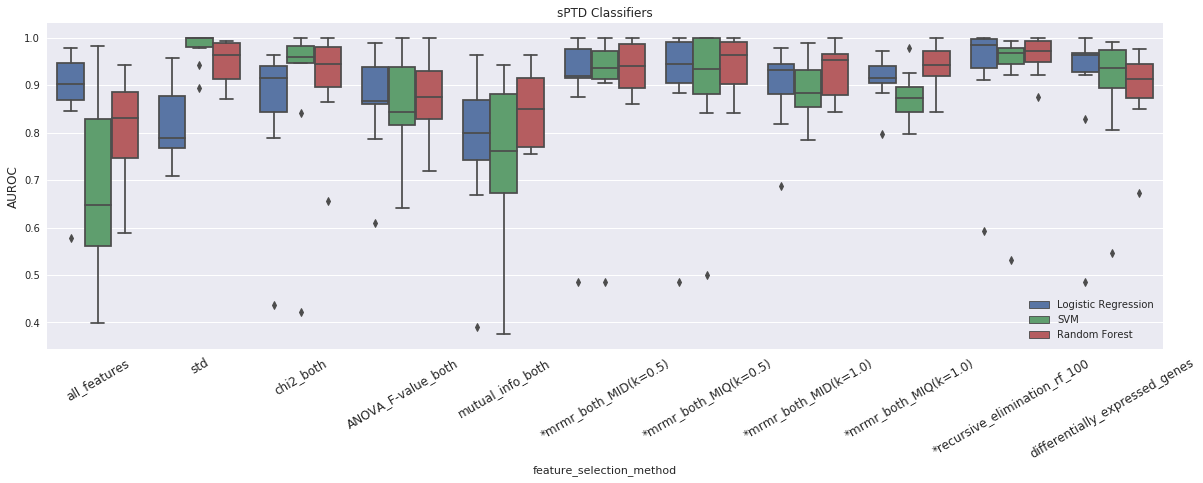

In [126]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='feature_selection_method', y='AUROC', hue='classifier', data=auroc_boxplot_df)
plt.xticks(rotation=30, fontsize=12)
plt.ylabel('AUROC', fontsize=12)
plt.legend(loc=4)
plt.title('sPTD Classifiers')

In [127]:
aupr_boxplot_df = pd.DataFrame(columns=['AU', 'classifier', 'dataset'])

model = RandomForestClassifier(n_estimators = 1200, max_leaf_nodes=30, criterion='entropy')
seed = 934
results = []
names = []
scoring = 'average_precision'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_sPTD.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_sPTD[:, re_selected_cols], y_sPTD, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
    results.append(cv_results)
    names.append(col)
for ind in range(len(results)):
    df = pd.DataFrame(results[ind], columns=['AU'])
    df['dataset'] = names[ind]
    df['classifier'] = 'Random Forest'
    aupr_boxplot_df = pd.concat([aupr_boxplot_df, df], sort=False)

model = SVC(kernel='rbf', gamma=0.01, probability=True, random_state=seed)
seed = 934
results = []
names = []
scoring = 'average_precision'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_sPTD.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_sPTD[:, re_selected_cols], y_sPTD, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
    results.append(cv_results)
    names.append(col)
for ind in range(len(results)):
    df = pd.DataFrame(results[ind], columns=['AU'])
    df['dataset'] = names[ind]
    df['classifier'] = 'SVM'
    aupr_boxplot_df = pd.concat([aupr_boxplot_df, df], sort=False)

model = LogisticRegression()
seed = 934
results = []
names = []
scoring = 'average_precision'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_sPTD.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_sPTD[:, re_selected_cols], y_sPTD, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
    results.append(cv_results)
    names.append(col)
for ind in range(len(results)):
    df = pd.DataFrame(results[ind], columns=['AU'])
    df['dataset'] = names[ind]
    df['classifier'] = 'Logistic Regression'
    aupr_boxplot_df = pd.concat([aupr_boxplot_df, df], sort=False)

aupr_boxplot_df['AU_type'] = 'AUPR'
aupr_boxplot_df = aupr_boxplot_df.rename(columns={'AU':'AUPR', 'dataset':'feature_selection_method', 'AU_type':'AUC_type'})

In [128]:
model = RandomForestClassifier(n_estimators = 1200, max_leaf_nodes=30, criterion='entropy')
seed = 934
results = []
names = []
scoring = 'average_precision'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_sPTD, y_sPTD, random_state=seed)
cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUPR'])
df['feature_selection_method'] = 'all_features'
df['classifier'] = 'Random Forest'
df['AUC_type'] = 'AUPR'
aupr_boxplot_df = pd.concat([df, aupr_boxplot_df], sort=False)

model = SVC(kernel='rbf', gamma=0.01, probability=True, random_state=seed)
seed = 934
results = []
names = []
scoring = 'average_precision'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_sPTD, y_sPTD, random_state=seed)
cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUPR'])
df['feature_selection_method'] = 'all_features'
df['classifier'] = 'SVM'
df['AUC_type'] = 'AUPR'
aupr_boxplot_df = pd.concat([df, aupr_boxplot_df], sort=False)

model = LogisticRegression()
seed = 934
results = []
names = []
scoring = 'average_precision'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_sPTD, y_sPTD, random_state=seed)
cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUPR'])
df['feature_selection_method'] = 'all_features'
df['classifier'] = 'Logistic Regression'
df['AUC_type'] = 'AUPR'
aupr_boxplot_df = pd.concat([df, aupr_boxplot_df], sort=False)

Text(0.5, 1.0, 'sPTD Classifiers')

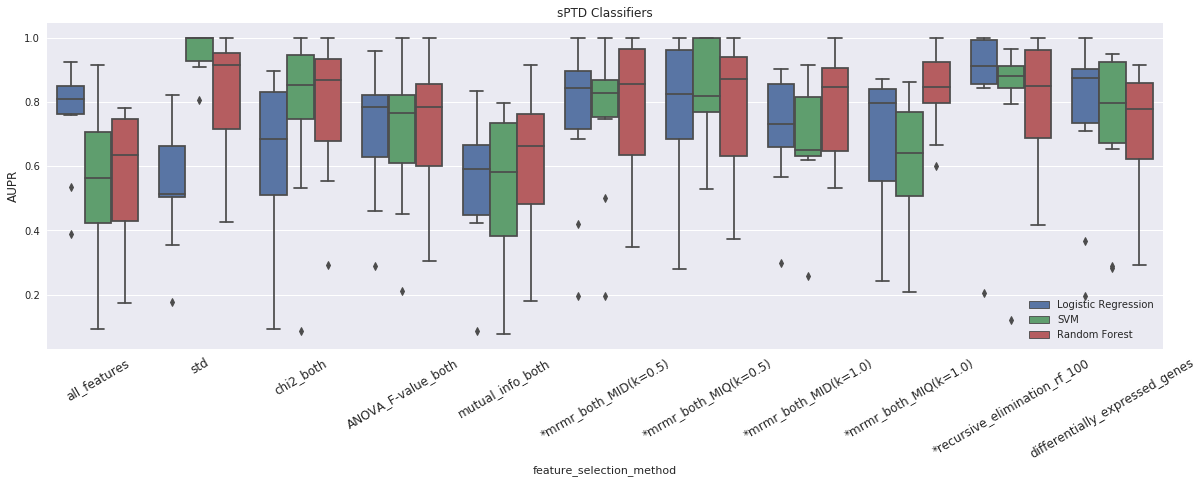

In [129]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='feature_selection_method', y='AUPR', hue='classifier', data=aupr_boxplot_df)
plt.xticks(rotation=30, fontsize=12)
plt.ylabel('AUPR', fontsize=12)
plt.legend(loc=4)
plt.title('sPTD Classifiers')

In [131]:
auroc_boxplot_df.rename(columns={'AUROC':'AUC'}, inplace=True)
aupr_boxplot_df.rename(columns={'AUPR':'AUC'}, inplace=True)
au_boxplot_df = pd.concat([auroc_boxplot_df, aupr_boxplot_df])
au_boxplot_df.head()

,AUC,feature_selection_method,classifier,AUC_type
0,0.910714,all_features,Logistic Regression,AUROC
1,0.975000,all_features,Logistic Regression,AUROC
2,0.578125,all_features,Logistic Regression,AUROC
3,0.846154,all_features,Logistic Regression,AUROC
4,0.979310,all_features,Logistic Regression,AUROC


In [132]:
au_boxplot_df.to_csv('./sPTD_classifiers_performance.csv', sep=',', index=None)

##### PPROM

In [116]:
auroc_boxplot_df = pd.DataFrame(columns=['AU', 'classifier', 'dataset'])

model = RandomForestClassifier(n_estimators = 1050, max_leaf_nodes=30, criterion='entropy')
seed = 934
results = []
names = []
scoring = 'roc_auc'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_PPROM.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_PPROM[:, re_selected_cols], y_PPROM, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
    results.append(cv_results)
    names.append(col)
for ind in range(len(results)):
    df = pd.DataFrame(results[ind], columns=['AU'])
    df['dataset'] = names[ind]
    df['classifier'] = 'Random Forest'
    auroc_boxplot_df = pd.concat([auroc_boxplot_df, df], sort=False)

model = SVC(kernel='rbf', gamma=0.01, probability=True, random_state=seed)
seed = 934
results = []
names = []
scoring = 'roc_auc'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_PPROM.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_PPROM[:, re_selected_cols], y_PPROM, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
    results.append(cv_results)
    names.append(col)
for ind in range(len(results)):
    df = pd.DataFrame(results[ind], columns=['AU'])
    df['dataset'] = names[ind]
    df['classifier'] = 'SVM'
    auroc_boxplot_df = pd.concat([auroc_boxplot_df, df], sort=False)

model = LogisticRegression()
seed = 934
results = []
names = []
scoring = 'roc_auc'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_PPROM.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_PPROM[:, re_selected_cols], y_PPROM, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
    results.append(cv_results)
    names.append(col)
for ind in range(len(results)):
    df = pd.DataFrame(results[ind], columns=['AU'])
    df['dataset'] = names[ind]
    df['classifier'] = 'Logistic Regression'
    auroc_boxplot_df = pd.concat([auroc_boxplot_df, df], sort=False)

auroc_boxplot_df['AU_type'] = 'AUROC'
auroc_boxplot_df = auroc_boxplot_df.rename(columns={
    'AU':'AUROC', 'dataset':'feature_selection_method', 'AU_type':'AUC_type'})

In [117]:
model = RandomForestClassifier(n_estimators = 1050, max_leaf_nodes=30, criterion='entropy')
seed = 934
results = []
names = []
scoring = 'roc_auc'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_PPROM, y_PPROM, random_state=seed)
cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUROC'])
df['feature_selection_method'] = 'all_features'
df['classifier'] = 'Random Forest'
df['AUC_type'] = 'AUROC'
auroc_boxplot_df = pd.concat([df, auroc_boxplot_df], sort=False)

model = SVC(kernel='rbf', gamma=0.01, probability=True, random_state=seed)
seed = 934
results = []
names = []
scoring = 'roc_auc'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_PPROM, y_PPROM, random_state=seed)
cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUROC'])
df['feature_selection_method'] = 'all_features'
df['classifier'] = 'SVM'
df['AUC_type'] = 'AUROC'
auroc_boxplot_df = pd.concat([df, auroc_boxplot_df], sort=False)

model = LogisticRegression()
seed = 934
results = []
names = []
scoring = 'roc_auc'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_PPROM, y_PPROM, random_state=seed)
cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUROC'])
df['feature_selection_method'] = 'all_features'
df['classifier'] = 'Logistic Regression'
df['AUC_type'] = 'AUROC'
auroc_boxplot_df = pd.concat([df, auroc_boxplot_df], sort=False)

Text(0.5, 1.0, 'PPROM Classifiers')

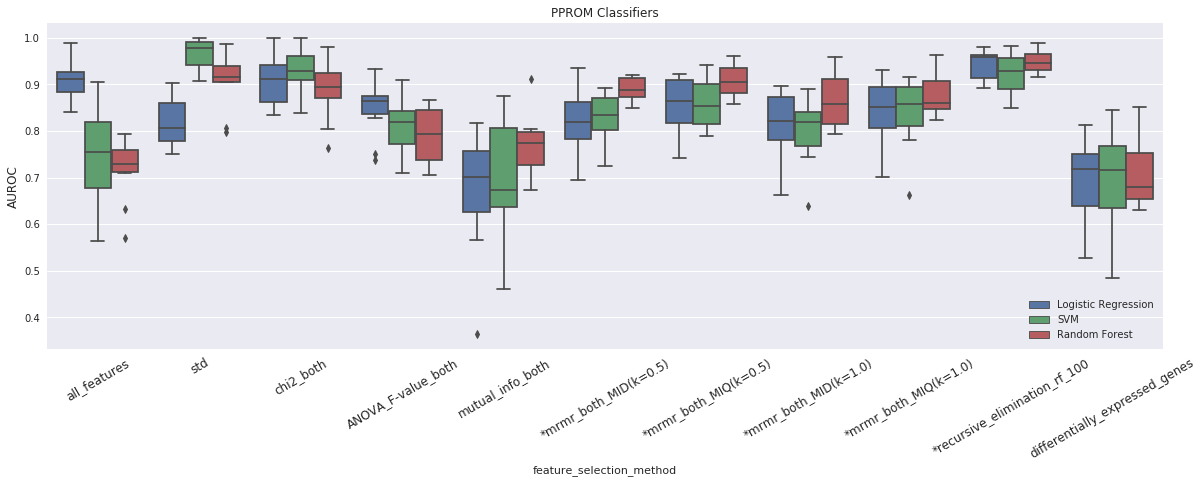

In [118]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='feature_selection_method', y='AUROC', hue='classifier', data=auroc_boxplot_df)
plt.xticks(rotation=30, fontsize=12)
plt.ylabel('AUROC', fontsize=12)
plt.legend(loc=4)
plt.title('PPROM Classifiers')

In [119]:
aupr_boxplot_df = pd.DataFrame(columns=['AU', 'classifier', 'dataset'])

model = RandomForestClassifier(n_estimators = 1050, max_leaf_nodes=30, criterion='entropy')
seed = 934
results = []
names = []
scoring = 'average_precision'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_PPROM.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_PPROM[:, re_selected_cols], y_PPROM, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
    results.append(cv_results)
    names.append(col)
for ind in range(len(results)):
    df = pd.DataFrame(results[ind], columns=['AU'])
    df['dataset'] = names[ind]
    df['classifier'] = 'Random Forest'
    aupr_boxplot_df = pd.concat([aupr_boxplot_df, df], sort=False)

model = SVC(kernel='rbf', gamma=0.01, probability=True, random_state=seed)
seed = 934
results = []
names = []
scoring = 'average_precision'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_PPROM.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_PPROM[:, re_selected_cols], y_PPROM, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
    results.append(cv_results)
    names.append(col)
for ind in range(len(results)):
    df = pd.DataFrame(results[ind], columns=['AU'])
    df['dataset'] = names[ind]
    df['classifier'] = 'SVM'
    aupr_boxplot_df = pd.concat([aupr_boxplot_df, df], sort=False)

model = LogisticRegression()
seed = 934
results = []
names = []
scoring = 'average_precision'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_PPROM.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_PPROM[:, re_selected_cols], y_PPROM, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
    results.append(cv_results)
    names.append(col)
for ind in range(len(results)):
    df = pd.DataFrame(results[ind], columns=['AU'])
    df['dataset'] = names[ind]
    df['classifier'] = 'Logistic Regression'
    aupr_boxplot_df = pd.concat([aupr_boxplot_df, df], sort=False)

aupr_boxplot_df['AU_type'] = 'AUPR'
aupr_boxplot_df = aupr_boxplot_df.rename(columns={
    'AU':'AUPR', 'dataset':'feature_selection_method', 'AU_type':'AUC_type'})

In [120]:
model = RandomForestClassifier(n_estimators = 1050, max_leaf_nodes=30, criterion='entropy')
seed = 934
results = []
names = []
scoring = 'average_precision'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_PPROM, y_PPROM, random_state=seed)
cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUPR'])
df['feature_selection_method'] = 'all_features'
df['classifier'] = 'Random Forest'
df['AUC_type'] = 'AUPR'
aupr_boxplot_df = pd.concat([df, aupr_boxplot_df], sort=False)

model = SVC(kernel='rbf', gamma=0.01, probability=True, random_state=seed)
seed = 934
results = []
names = []
scoring = 'average_precision'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_PPROM, y_PPROM, random_state=seed)
cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUPR'])
df['feature_selection_method'] = 'all_features'
df['classifier'] = 'SVM'
df['AUC_type'] = 'AUPR'
aupr_boxplot_df = pd.concat([df, aupr_boxplot_df], sort=False)

model = LogisticRegression()
seed = 934
results = []
names = []
scoring = 'average_precision'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_PPROM, y_PPROM, random_state=seed)
cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUPR'])
df['feature_selection_method'] = 'all_features'
df['classifier'] = 'Logistic Regression'
df['AUC_type'] = 'AUPR'
aupr_boxplot_df = pd.concat([df, aupr_boxplot_df], sort=False)

Text(0.5, 1.0, 'PPROM Classifiers')

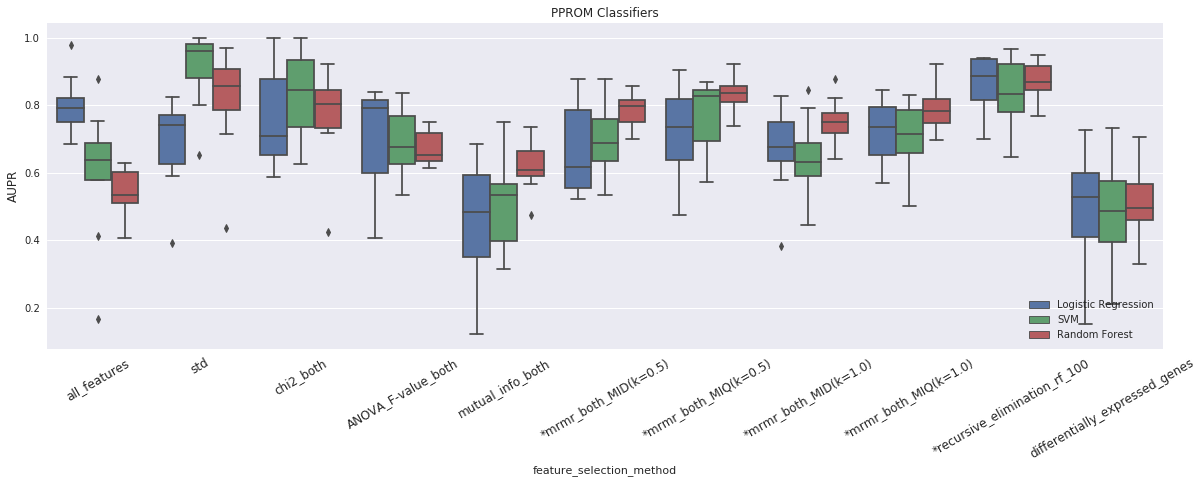

In [121]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='feature_selection_method', y='AUPR', hue='classifier', data=aupr_boxplot_df)
plt.xticks(rotation=30, fontsize=12)
plt.ylabel('AUPR', fontsize=12)
plt.legend(loc=4)
plt.title('PPROM Classifiers')

In [122]:
auroc_boxplot_df = auroc_boxplot_df.rename(columns={'AUROC':'AUC'})
aupr_boxplot_df = aupr_boxplot_df.rename(columns={'AUPR':'AUC'})
au_boxplot_df = pd.concat([auroc_boxplot_df, aupr_boxplot_df])
au_boxplot_df.head()

,AUC,feature_selection_method,classifier,AUC_type
0,0.909091,all_features,Logistic Regression,AUROC
1,0.900383,all_features,Logistic Regression,AUROC
2,0.915709,all_features,Logistic Regression,AUROC
3,0.939394,all_features,Logistic Regression,AUROC
4,0.989899,all_features,Logistic Regression,AUROC


In [123]:
au_boxplot_df.to_csv('./PPROM_classifiers_performance.csv', sep=',', index=None)

## Ensemble All 3 Algorithms!

In [41]:
gene_selection_bool = pd.read_csv('./gene_selection_bool.csv', header=None).values.reshape(-1, )
gene_selection_bool

array([False, False, False, ..., False, False, False])

In [109]:
au_boxplot_df = pd.DataFrame(columns=['AUC', 'classifier', 'feature_selection_method', 'AUC_type'])
seed = 934

In [110]:
sPTD_RF = RandomForestClassifier(n_estimators = 1200, max_leaf_nodes=30, criterion='entropy')
sPTD_SVM = SVC(kernel='rbf', gamma=0.01, probability=True, random_state=seed)
sPTD_LR = LogisticRegression()
sPTD_clf = VotingClassifier(
    estimators=[('sPTD_RF', sPTD_RF), ('sPTD_LR', sPTD_LR), ('sPTD_SVM', sPTD_SVM)], 
    voting='soft', weights=[2,2,1])

In [111]:
scoring = 'roc_auc'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_sPTD[:, gene_selection_bool], y_sPTD, random_state=seed)
cv_results = cross_val_score(sPTD_clf, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUC'])
df['feature_selection_method'] = '*recursive_elimination_rf_100'
df['classifier'] = 'sPTD_ensemble'
df['AUC_type'] = 'AUROC'
au_boxplot_df = pd.concat([au_boxplot_df, df])

scoring = 'average_precision'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_sPTD[:, gene_selection_bool], y_sPTD, random_state=seed)
cv_results = cross_val_score(sPTD_clf, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUC'])
df['feature_selection_method'] = '*recursive_elimination_rf_100'
df['classifier'] = 'sPTD_ensemble'
df['AUC_type'] = 'AUPR'
au_boxplot_df = pd.concat([au_boxplot_df, df])

In [112]:
PPROM_RF = RandomForestClassifier(n_estimators = 1050, max_leaf_nodes=30, criterion='entropy')
PPROM_SVM = SVC(kernel='rbf', gamma=0.01, probability=True, random_state=seed)
PPROM_LR = LogisticRegression()
PPROM_clf = VotingClassifier(
    estimators=[('PPROM_RF', PPROM_RF), ('PPROM_LR', PPROM_LR), ('PPROM_SVM', PPROM_SVM)], 
    voting='soft', weights=[2,2,1])

In [113]:
scoring = 'roc_auc'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_PPROM[:, gene_selection_bool], y_PPROM, random_state=seed)
cv_results = cross_val_score(PPROM_clf, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUC'])
df['feature_selection_method'] = '*recursive_elimination_rf_100'
df['classifier'] = 'PPROM_ensemble'
df['AUC_type'] = 'AUROC'
au_boxplot_df = pd.concat([au_boxplot_df, df])

scoring = 'average_precision'
kfold = KFold(n_splits=10, random_state=seed)
X_s, y_s = shuffle(X_PPROM[:, gene_selection_bool], y_PPROM, random_state=seed)
cv_results = cross_val_score(PPROM_clf, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=50)
df = pd.DataFrame(cv_results, columns=['AUC'])
df['feature_selection_method'] = '*recursive_elimination_rf_100'
df['classifier'] = 'PPROM_ensemble'
df['AUC_type'] = 'AUPR'
au_boxplot_df = pd.concat([au_boxplot_df, df])

### Let's decide an ensemble way!

only with rf

Text(0.5, 1.0, 'Ensemble Classifiers')

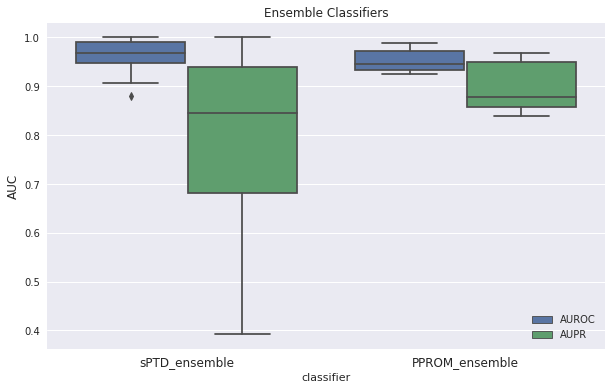

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='classifier', y='AUC', hue='AUC_type', data=au_boxplot_df)
plt.xticks(fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.legend(loc=4)
plt.title('Ensemble Classifiers')

rf : lr = 1 : 1

Text(0.5, 1.0, 'Ensemble Classifiers')

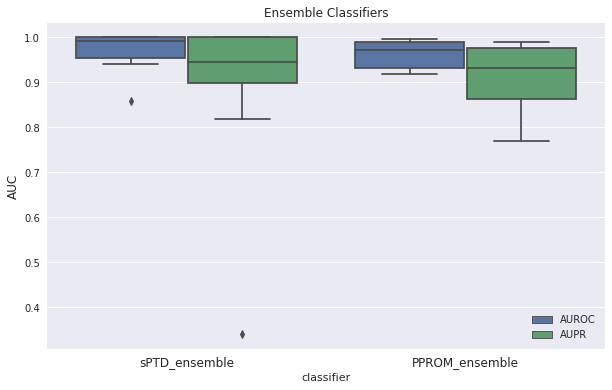

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='classifier', y='AUC', hue='AUC_type', data=au_boxplot_df)
plt.xticks(fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.legend(loc=4)
plt.title('Ensemble Classifiers')

rf : lr : svm = 1 : 1 : 1

Text(0.5, 1.0, 'Ensemble Classifiers')

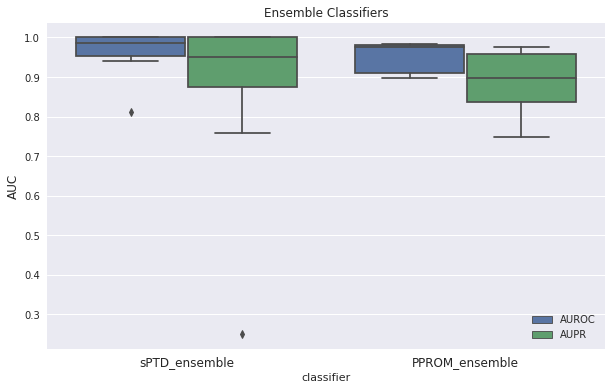

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='classifier', y='AUC', hue='AUC_type', data=au_boxplot_df)
plt.xticks(fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.legend(loc=4)
plt.title('Ensemble Classifiers')

rf : lr : svm = 2 : 2 : 1

Text(0.5, 1.0, 'Ensemble Classifiers')

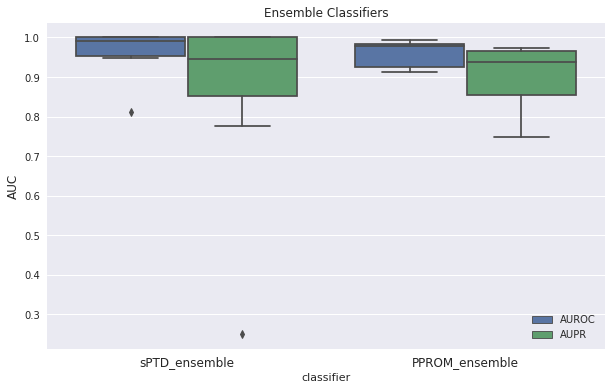

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='classifier', y='AUC', hue='AUC_type', data=au_boxplot_df)
plt.xticks(fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.legend(loc=4)
plt.title('Ensemble Classifiers')

## Appendix

### selected genes comparison

In [89]:
model = RandomForestClassifier(n_estimators = 1200, max_leaf_nodes=30, criterion='entropy')
seed = 934

results = []
names = []
scoring = 'roc_auc'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_sPTD.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_sPTD[:, re_selected_cols], y_sPTD)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=40)
    results.append(cv_results)
    names.append(col)

/data/software/Anaconda3/4.4.0-foss-2017a/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


[Text(0, 0, 'std'),
 Text(0, 0, 'chi2_sPTD'),
 Text(0, 0, 'chi2_PPROM'),
 Text(0, 0, 'chi2_both'),
 Text(0, 0, 'ANOVA_ F-value_sPTD'),
 Text(0, 0, 'ANOVA F-value_PPROM'),
 Text(0, 0, 'ANOVA_F-value_both'),
 Text(0, 0, 'mutual_info_sPTD'),
 Text(0, 0, 'mutual_info_PPROM'),
 Text(0, 0, 'mutual_info_both'),
 Text(0, 0, 'mrmr_sPTD_MIQ'),
 Text(0, 0, 'mrmr_sPTD_MID'),
 Text(0, 0, 'mrmr_PPROM_MID'),
 Text(0, 0, 'mrmr_PPROM_MIQ'),
 Text(0, 0, 'mrmr_both_MID'),
 Text(0, 0, 'mrmr_both_MIQ'),
 Text(0, 0, '*mrmr_both_MID(k=0.5)'),
 Text(0, 0, '*mrmr_both_MIQ(k=0.5)'),
 Text(0, 0, '*mrmr_both_MID(k=1.0)'),
 Text(0, 0, '*mrmr_both_MIQ(k=1.0)'),
 Text(0, 0, '*recursive_elimination_rf'),
 Text(0, 0, '*recursive_elimination_rf_100'),
 Text(0, 0, 'differentially_expressed_genes')]

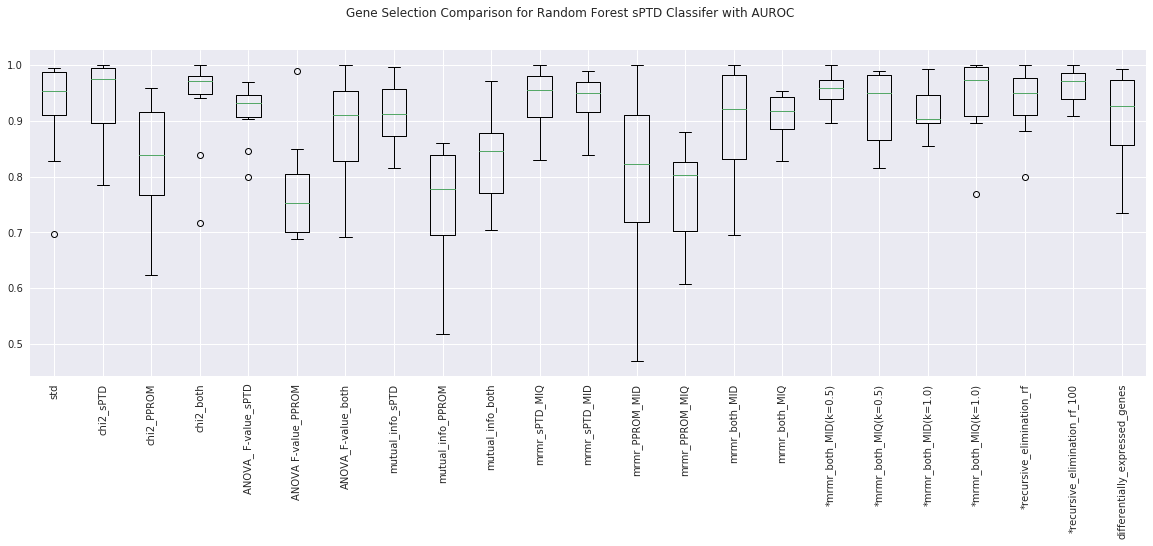

In [90]:
fig = plt.figure(figsize=(20, 6))
fig.suptitle('Gene Selection Comparison for Random Forest sPTD Classifer with AUROC')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names, rotation=90)

In [106]:
model = RandomForestClassifier(n_estimators = 1200, max_leaf_nodes=30, criterion='entropy')
seed = 934

results = []
names = []
scoring = 'average_precision'
for col in selected_genes.columns:
    re_selected_cols = gene_expression_label_sPTD.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
    kfold = KFold(n_splits=10, random_state=seed)
    X_s, y_s = shuffle(X_sPTD[:, re_selected_cols], y_sPTD)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=40)
    results.append(cv_results)
    names.append(col)

([<matplotlib.axis.XTick at 0x7f3e9d1fa710>,
 <a list of 23 Text xticklabel objects>)

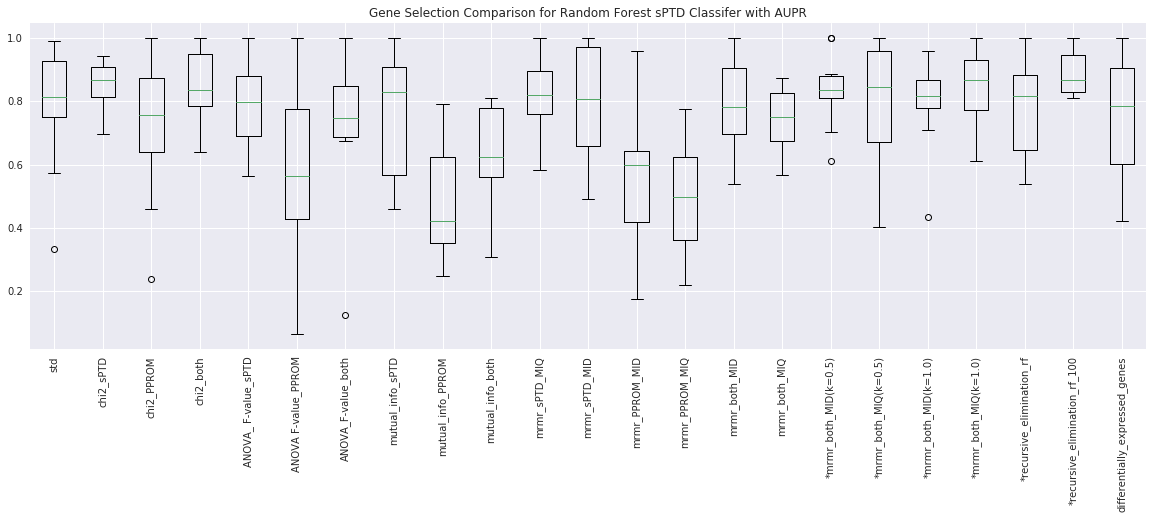

In [107]:
plt.figure(figsize=(20, 6))
plt.title('Gene Selection Comparison for Random Forest sPTD Classifer with AUPR')
plt.boxplot(results)
plt.xticks((range(1, len(results)+1)), names, rotation='vertical')

In [111]:
seed = 934
sPTD_models = []
sPTD_models.append(('Random Forest', RandomForestClassifier(n_estimators = 1200, max_leaf_nodes=30, n_jobs=40, criterion='entropy')))
sPTD_models.append(('logistic', LogisticRegression()))
sPTD_models.append(('SVM', SVC()))

results = []
names = []
scoring = 'roc_auc'
col = 'chi2_both'

re_selected_cols = gene_expression_label_sPTD.columns[:-1].isin(selected_genes[col].tolist()[:100]).copy()
X_s, y_s = shuffle(X_sPTD[:, re_selected_cols], y_sPTD)
for name, model in sPTD_models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_s, y_s, cv=kfold, scoring=scoring, n_jobs=40)
    results.append(cv_results)
    names.append(name)

([<matplotlib.axis.XTick at 0x7f3e8617e780>,
 <a list of 3 Text xticklabel objects>)

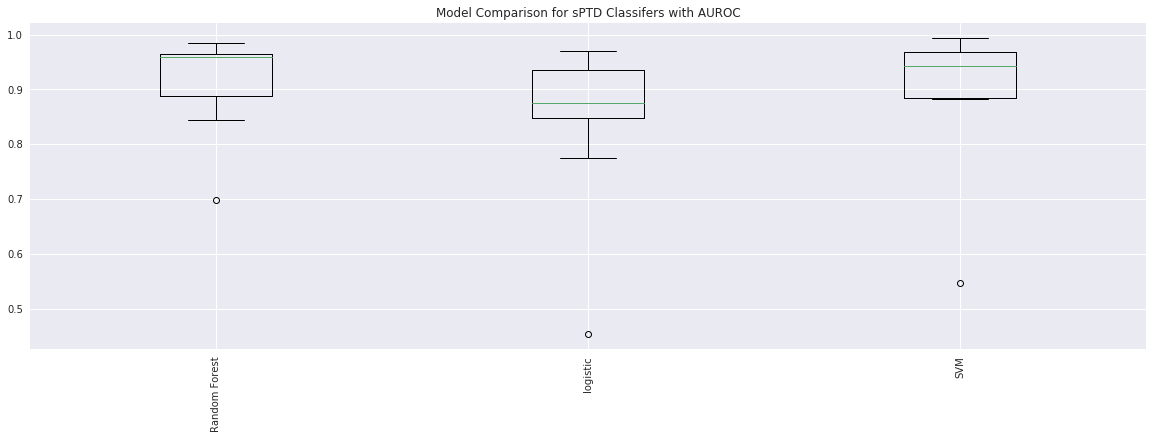

In [112]:
plt.figure(figsize=(20, 6))
plt.title('Model Comparison for sPTD Classifers with AUROC')
plt.boxplot(results)
plt.xticks((range(1, len(results)+1)), names, rotation='vertical')

### Decision Tree

In [143]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"], 
              "class_weight":[{0:13, 1:1}]}

In [168]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

In [169]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

In [170]:
# Fit it to the data
tree_cv.fit(X_sPTD,y_sPTD)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [171]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'class_weight': {0: 13, 1: 1}, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3}
Best score is 0.925575101488498


In [206]:
tree_model = DecisionTreeClassifier(class_weight={0: 5, 1: 1}, criterion='entropy', random_state=934)

In [207]:
tree_model.fit(X_sPTD,y_sPTD)

DecisionTreeClassifier(class_weight={0: 5, 1: 1}, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=934, splitter='best')

In [208]:
y_pred_prob = tree_model.predict_proba(X_sPTD)[:, 1]
roc_auc_score(y_sPTD, y_pred_prob)

1.0

In [183]:
importance_score = tree_model.feature_importances_

In [209]:
importance_score

array([0., 0., 0., ..., 0., 0., 0.])

In [217]:
importance_score[np.argsort(importance_score)[::-1]][:20]

array([0.09223793, 0.08021582, 0.07852381, 0.0765918 , 0.06689893,
       0.06553619, 0.05463864, 0.05154424, 0.04804543, 0.04456046,
       0.04253244, 0.04102478, 0.04085148, 0.04017689, 0.0398236 ,
       0.03882493, 0.03517786, 0.0327802 , 0.03001457, 0.        ])

In [218]:
gene_expression_label_sPTD.columns[np.argsort(importance_score)[::-1]][:20]

Index(['102724528_at', '5453_at', '25792_at', '89839_at', '245802_at',
       '105377742_at', '84083_at', '3087_at', '100131067_at', '105378027_at',
       '102724081_at', '6228_at', '4038_at', '107985359_at', '222255_at',
       '2196_at', '353091_at', '13_at', '100130373_at', '123264_at'],
      dtype='object')